# ChemShift Plot of 2CEF

## For first simuation in TIP4PEW

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# function to load the sparta+ pred file
def loadpred(file_name):
    f = open(file_name)
    r = f.readlines()
    content = []
    for i in range(27,len(r)):
        content.append(r[i].split())
    return content


def loadpred_CA(file_name):
    content = loadpred(file_name)

    CA_list = []
    for i in range(len(content)):
        if content[i][2] == 'CA':
            CA_list.append(content[i])
    
    CA_2shift = [float(item[4]) for item in CA_list]

    return CA_2shift


def loadpred_CA_2(file_name):
    content = loadpred(file_name)

    CA_list = []
    for i in range(len(content)):
        if content[i][2] == 'CA':
            CA_list.append(content[i])
    
    CA_2shift = [float(item[3]) for item in CA_list]

    return CA_2shift


def loadpred_HA(file_name):
    content = loadpred(file_name)

    HA_list = []
    for i in range(len(content)):
        if content[i][2] == 'HA':
            HA_list.append(content[i])
        elif content[i][2] == 'HA2':
            HA_list.append(content[i])
    
    HA_2shift = [float(item[4]) for item in HA_list]

    return HA_2shift


def loadpred_HN(file_name):
    content = loadpred(file_name)

    HN_list = []
    for i in range(len(content)):
        if content[i][2] == 'HN':
            HN_list.append(content[i])
        elif content[i][2] == 'HA' and content[i][1] == 'P':
            HN_list.append([None,None,None,None,201])
    
    HN_2shift = [None] + [float(item[4]) for item in HN_list]
    HN_2shift_new = [None if i == 201 else i for i in HN_2shift]

    return HN_2shift_new


def loadpred_N(file_name):
    content = loadpred(file_name)

    N_list = []
    for i in range(len(content)):
        if content[i][2] == 'N':
            N_list.append(content[i])
        elif content[i][2] == 'HA' and content[i][1] == 'P':
            N_list.append([None,None,None,None,201])
    
    N_2shift = [None] + [float(item[4]) for item in N_list]
    N_2shift_new = [None if i == 201 else i for i in N_2shift]

    return N_2shift_new


def loadpred_C(file_name):
    content = loadpred(file_name)

    C_list = []
    for i in range(len(content)):
        if content[i][2] == 'C':
            C_list.append(content[i])
    
    C_2shift = [float(item[4]) for item in C_list] + [None]

    return C_2shift


def loadpred_CB(file_name):
    content = loadpred(file_name)

    CB_list = []
    for i in range(len(content)):
        if content[i][2] == 'CB':
            CB_list.append(content[i])
        elif content[i][2] == 'CA' and content[i][1] == 'G':
            CB_list.append([None,None,None,None,201])
    
    CB_2shift = [float(item[4]) for item in CB_list]
    CB_2shift_new = [None if i == 201 else i for i in CB_2shift]

    return CB_2shift_new



def RMSD(list_1,list_2):
    if len(list_1) != len(list_2):
        return 0
    else:
        rmsd = 0
        count = 0
        for i in range(len(list_1)-1):                      # here minus 1 to delete the final residue, for sparta+ only predicts it into 0
            if list_1[i] != None and list_2[i] != None:
                rmsd += (list_1[i]-list_2[i])**2
                count += 1
            else:
                pass
        return np.sqrt(rmsd/count)



In [2]:
# load pred file and seperate them in to different types of Chemical Shifts
pred = loadpred("2cef.md.pdb_pred_sim1.tab")

C_list = []
CA_list = []
CB_list = []
HA_list = []
HN_list = []
N_list = []
for i in range(len(pred)):
    if pred[i][2] == 'C':
        C_list.append(pred[i])
    if pred[i][2] == 'CA':
        CA_list.append(pred[i])
    if pred[i][2] == 'CB':
        CB_list.append(pred[i])
    if pred[i][2] == 'HA' or 'HA2':
        HA_list.append(pred[i])
    if pred[i][2] == 'HN':
        HN_list.append(pred[i])
    if pred[i][2] == 'N':
        N_list.append(pred[i])



In [3]:
# Prepare plot data
C_2shift = [float(item[3]) for item in C_list]
CA_2shift = [float(item[3]) for item in CA_list]
CB_2shift = [float(item[3]) for item in CB_list]
HA_2shift = [float(item[3]) for item in HA_list]
HN_2shift = [float(item[3]) for item in HN_list]
N_2shift = [float(item[3]) for item in N_list]


res_list = [item[0]+item[1] for item in CA_list]

print(res_list)

['1C', '2R', '3K', '4A', '5G', '6V', '7G', '8Q', '9S', '10W', '11K', '12E', '13N', '14S', '15P', '16L', '17N', '18V', '19S']


In [4]:
# CA Experimental
Experimental_data_raw = [None,None,56.2,52.4,None,62.3,45.2,55.7,58,57.5,55.6,56.3,53.3,55.8,None,55.16,53.1,62,60]
RCoil_data = [float(item[5]) for item in CA_list]

Experimental_data = []
for i in range(len(RCoil_data)):
    if Experimental_data_raw[i] != None:
        Experimental_data.append(Experimental_data_raw[i]-RCoil_data[i])
    else:
        Experimental_data.append(None)


print(Experimental_data)


[None, None, -0.08699999999999619, 0.36299999999999955, None, 0.0, 0.10000000000000142, -0.10299999999999443, -0.20000000000000284, 0.15500000000000114, -0.6869999999999976, -0.10000000000000142, 0.25, -2.4000000000000057, None, 0.3199999999999932, 0.05000000000000426, -0.29999999999999716, 1.7999999999999972]


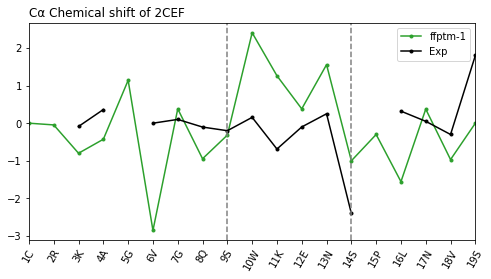

In [5]:
# Plotting!

plt.subplots(figsize=(8,4))

plt.plot(CA_2shift,'.-',label='ffptm-1',color="tab:green")
plt.plot(Experimental_data,'.-',label='Exp',color="black")



plt.title('Cα Chemical shift of 2CEF',loc='left')

plt.xlim(0, len(CA_2shift)-1)
plt.xticks(np.arange(0,len(res_list)),res_list,rotation='60')

# Tag modified residues
plt.axvline(x=8, ymin=0, ymax=1,color="grey",linestyle="--")
plt.axvline(x=13, ymin=0, ymax=1,color="grey",linestyle="--")

plt.legend()

plt.show()

## Adding more simuation in TIP4PEW

In [6]:
# Collection Data

Experimental_data = Experimental_data


In [7]:
# load pred file and seperate them in to different types of Chemical Shifts

CA_2shift_sim1 = loadpred_CA_2("2cef.md.pdb_pred_sim1.tab")
CA_2shift_sim2 = loadpred_CA_2("2cef.md.pdb_pred_sim2.tab")
CA_2shift_sim3 = loadpred_CA_2("2cef.md.pdb_pred_sim3.tab")
CA_2shift_sim4 = loadpred_CA_2("2cef.md.pdb_pred_sim4.tab")
CA_2shift_sim5 = loadpred_CA_2("2cef.md.pdb_pred_sim5.tab")



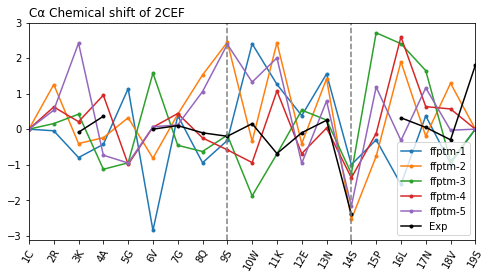

In [8]:
# Plotting!

plt.subplots(figsize=(8,4))

plt.plot(CA_2shift_sim1,'.-',label='ffptm-1')
plt.plot(CA_2shift_sim2,'.-',label='ffptm-2')
plt.plot(CA_2shift_sim3,'.-',label='ffptm-3')
plt.plot(CA_2shift_sim4,'.-',label='ffptm-4')
plt.plot(CA_2shift_sim5,'.-',label='ffptm-5')

plt.plot(Experimental_data,'.-',label='Exp',color="black")



plt.title('Cα Chemical shift of 2CEF',loc='left')

plt.xlim(0, len(CA_2shift)-1)
plt.xticks(np.arange(0,len(res_list)),res_list,rotation='60')

# Tag modified residues
plt.axvline(x=8, ymin=0, ymax=1,color="grey",linestyle="--")
plt.axvline(x=13, ymin=0, ymax=1,color="grey",linestyle="--")

plt.legend()

plt.show()

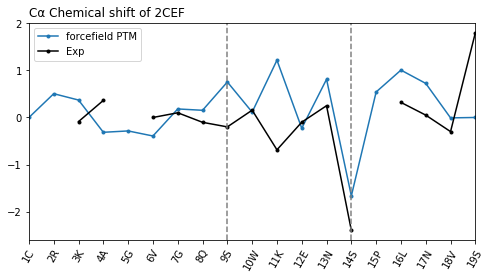

In [9]:
# Average Plotting!

CA_2shift_avg = [(CA_2shift_sim1[i]+CA_2shift_sim2[i]+CA_2shift_sim3[i]+CA_2shift_sim4[i]+CA_2shift_sim5[i])/5 for i in range(len(CA_2shift_sim1))]

plt.subplots(figsize=(8,4))

plt.plot(CA_2shift_avg,'.-',label='forcefield PTM')

plt.plot(Experimental_data,'.-',label='Exp',color="black")



plt.title('Cα Chemical shift of 2CEF',loc='left')

plt.xlim(0, len(CA_2shift)-1)
plt.xticks(np.arange(0,len(res_list)),res_list,rotation='60')

# Tag modified residues
plt.axvline(x=8, ymin=0, ymax=1,color="grey",linestyle="--")
plt.axvline(x=13, ymin=0, ymax=1,color="grey",linestyle="--")

plt.legend()

plt.show()

## Comparing CMAP + TIP4PEW

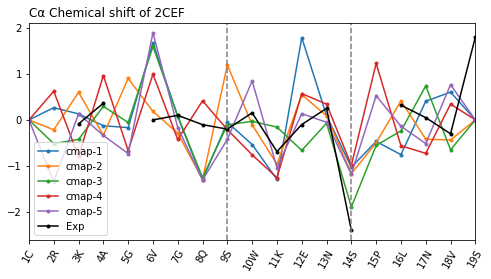

In [10]:
# Collection Data
Experimental_data = Experimental_data

# load pred file and seperate them in to different types of Chemical Shifts
CA_2shift_CMAP_sim1 = loadpred_CA_2("2cef.md.pdb_pred_CMAP_sim1.tab")
CA_2shift_CMAP_sim2 = loadpred_CA_2("2cef.md.pdb_pred_CMAP_sim2.tab")
CA_2shift_CMAP_sim3 = loadpred_CA_2("2cef.md.pdb_pred_CMAP_sim3.tab")
CA_2shift_CMAP_sim4 = loadpred_CA_2("2cef.md.pdb_pred_CMAP_sim4.tab")
CA_2shift_CMAP_sim5 = loadpred_CA_2("2cef.md.pdb_pred_CMAP_sim5.tab")

# Plotting!

plt.subplots(figsize=(8,4))

plt.plot(CA_2shift_CMAP_sim1,'.-',label='cmap-1')
plt.plot(CA_2shift_CMAP_sim2,'.-',label='cmap-2')
plt.plot(CA_2shift_CMAP_sim3,'.-',label='cmap-3')
plt.plot(CA_2shift_CMAP_sim4,'.-',label='cmap-4')
plt.plot(CA_2shift_CMAP_sim5,'.-',label='cmap-5')

plt.plot(Experimental_data,'.-',label='Exp',color="black")



plt.title('Cα Chemical shift of 2CEF',loc='left')

plt.xlim(0, len(CA_2shift)-1)
plt.xticks(np.arange(0,len(res_list)),res_list,rotation='60')

# Tag modified residues
plt.axvline(x=8, ymin=0, ymax=1,color="grey",linestyle="--")
plt.axvline(x=13, ymin=0, ymax=1,color="grey",linestyle="--")

plt.legend()

plt.show()

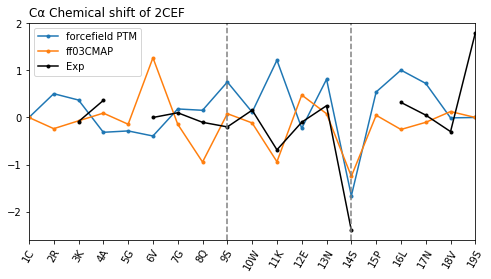

In [11]:
# Average Plotting!

CA_2shift_CMAP_avg = [(CA_2shift_CMAP_sim1[i]+CA_2shift_CMAP_sim2[i]+CA_2shift_CMAP_sim3[i]+CA_2shift_CMAP_sim4[i]+CA_2shift_CMAP_sim5[i])/5 for i in range(len(CA_2shift_CMAP_sim1))]

plt.subplots(figsize=(8,4))

plt.plot(CA_2shift_avg,'.-',label='forcefield PTM')
plt.plot(CA_2shift_CMAP_avg,'.-',label='ff03CMAP')
plt.plot(Experimental_data,'.-',label='Exp',color="black")



plt.title('Cα Chemical shift of 2CEF',loc='left')

plt.xlim(0, len(CA_2shift)-1)
plt.xticks(np.arange(0,len(res_list)),res_list,rotation='60')

# Tag modified residues
plt.axvline(x=8, ymin=0, ymax=1,color="grey",linestyle="--")
plt.axvline(x=13, ymin=0, ymax=1,color="grey",linestyle="--")

plt.legend()

plt.savefig("2cef_TIP4PEW.png",dpi=100)

plt.show()

In [12]:
print("Cα RMSD forcefield_PTM TIP4PEW",RMSD(CA_2shift_avg,Experimental_data))
print("Cα RMSD ff03CMAP TIP4PEW",RMSD(CA_2shift_CMAP_avg,Experimental_data))

Cα RMSD forcefield_PTM TIP4PEW 0.7227638835944774
Cα RMSD ff03CMAP TIP4PEW 0.5910759269574195


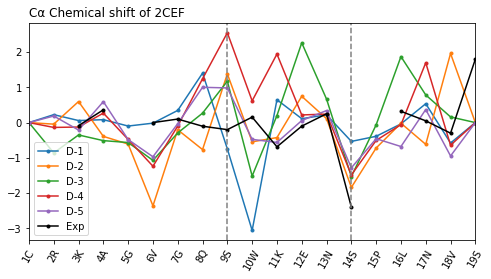

In [13]:
# Collection Data
Experimental_data = Experimental_data

# load pred file and seperate them in to different types of Chemical Shifts
CA_2shift_D_sim1 = loadpred_CA_2("2cef.md.pdb_pred_D_sim1.tab")
CA_2shift_D_sim2 = loadpred_CA_2("2cef.md.pdb_pred_D_sim2.tab")
CA_2shift_D_sim3 = loadpred_CA_2("2cef.md.pdb_pred_D_sim3.tab")
CA_2shift_D_sim4 = loadpred_CA_2("2cef.md.pdb_pred_D_sim4.tab")
CA_2shift_D_sim5 = loadpred_CA_2("2cef.md.pdb_pred_D_sim5.tab")

# load pred file and seperate them in to different types of Chemical Shifts
CA_2shift_D_CMAP_sim1 = loadpred_CA_2("2cef.md.pdb_pred_D_CMAP_sim1.tab")
CA_2shift_D_CMAP_sim2 = loadpred_CA_2("2cef.md.pdb_pred_D_CMAP_sim2.tab")
CA_2shift_D_CMAP_sim3 = loadpred_CA_2("2cef.md.pdb_pred_D_CMAP_sim3.tab")
CA_2shift_D_CMAP_sim4 = loadpred_CA_2("2cef.md.pdb_pred_D_CMAP_sim4.tab")
CA_2shift_D_CMAP_sim5 = loadpred_CA_2("2cef.md.pdb_pred_D_CMAP_sim5.tab")


# Plotting!

plt.subplots(figsize=(8,4))

plt.plot(CA_2shift_D_sim1,'.-',label='D-1')
plt.plot(CA_2shift_D_sim2,'.-',label='D-2')
plt.plot(CA_2shift_D_sim3,'.-',label='D-3')
plt.plot(CA_2shift_D_sim4,'.-',label='D-4')
plt.plot(CA_2shift_D_sim5,'.-',label='D-5')

plt.plot(Experimental_data,'.-',label='Exp',color="black")



plt.title('Cα Chemical shift of 2CEF',loc='left')

plt.xlim(0, len(CA_2shift)-1)
plt.xticks(np.arange(0,len(res_list)),res_list,rotation='60')

# Tag modified residues
plt.axvline(x=8, ymin=0, ymax=1,color="grey",linestyle="--")
plt.axvline(x=13, ymin=0, ymax=1,color="grey",linestyle="--")

plt.legend()

plt.show()

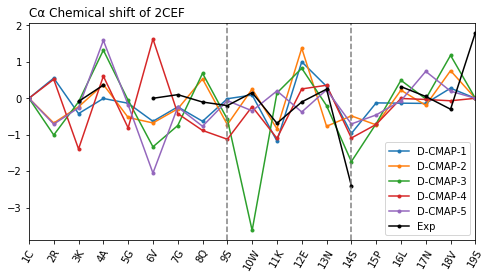

In [14]:
# Plotting!

plt.subplots(figsize=(8,4))

plt.plot(CA_2shift_D_CMAP_sim1,'.-',label='D-CMAP-1')
plt.plot(CA_2shift_D_CMAP_sim2,'.-',label='D-CMAP-2')
plt.plot(CA_2shift_D_CMAP_sim3,'.-',label='D-CMAP-3')
plt.plot(CA_2shift_D_CMAP_sim4,'.-',label='D-CMAP-4')
plt.plot(CA_2shift_D_CMAP_sim5,'.-',label='D-CMAP-5')

plt.plot(Experimental_data,'.-',label='Exp',color="black")



plt.title('Cα Chemical shift of 2CEF',loc='left')

plt.xlim(0, len(CA_2shift)-1)
plt.xticks(np.arange(0,len(res_list)),res_list,rotation='60')

# Tag modified residues
plt.axvline(x=8, ymin=0, ymax=1,color="grey",linestyle="--")
plt.axvline(x=13, ymin=0, ymax=1,color="grey",linestyle="--")

plt.legend()

plt.show()

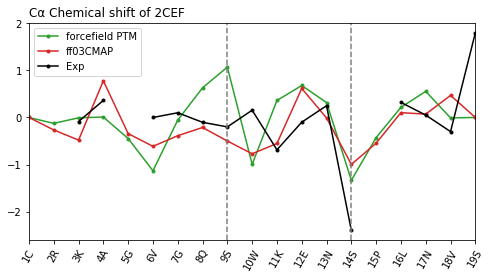

In [15]:
# Average Plotting!

CA_2shift_D_avg = [(CA_2shift_D_sim1[i]+CA_2shift_D_sim2[i]+CA_2shift_D_sim3[i]+CA_2shift_D_sim4[i]+CA_2shift_D_sim5[i])/5 for i in range(len(CA_2shift_D_sim1))]
CA_2shift_D_CMAP_avg = [(CA_2shift_D_CMAP_sim1[i]+CA_2shift_D_CMAP_sim2[i]+CA_2shift_D_CMAP_sim3[i]+CA_2shift_D_CMAP_sim4[i]+CA_2shift_D_CMAP_sim5[i])/5 for i in range(len(CA_2shift_D_CMAP_sim1))]

plt.subplots(figsize=(8,4))

plt.plot(CA_2shift_D_avg,'.-',label='forcefield PTM',color="tab:green")
plt.plot(CA_2shift_D_CMAP_avg,'.-',label='ff03CMAP',color="tab:red")
plt.plot(Experimental_data,'.-',label='Exp',color="black")



plt.title('Cα Chemical shift of 2CEF',loc='left')

plt.xlim(0, len(CA_2shift)-1)
plt.xticks(np.arange(0,len(res_list)),res_list,rotation='60')

# Tag modified residues
plt.axvline(x=8, ymin=0, ymax=1,color="grey",linestyle="--")
plt.axvline(x=13, ymin=0, ymax=1,color="grey",linestyle="--")

plt.legend()

plt.savefig("2cef_TIP4PD.png",dpi=100)

plt.show()

In [16]:
print("Cα RMSD forcefield_PTM TIP4PD ",RMSD(CA_2shift_D_avg,Experimental_data))
print("Cα RMSD ff03CMAP TIP4PD ",RMSD(CA_2shift_D_CMAP_avg,Experimental_data))

Cα RMSD forcefield_PTM TIP4PD  0.7609942519024514
Cα RMSD ff03CMAP TIP4PD  0.6040832038244883


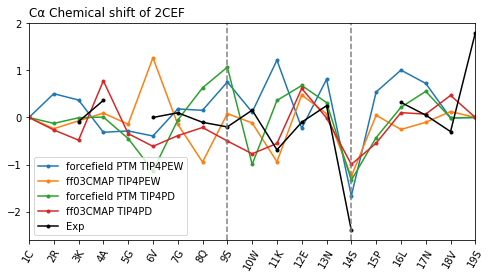

In [17]:
plt.subplots(figsize=(8,4))

plt.plot(CA_2shift_avg,'.-',label='forcefield PTM TIP4PEW')
plt.plot(CA_2shift_CMAP_avg,'.-',label='ff03CMAP TIP4PEW')
plt.plot(CA_2shift_D_avg,'.-',label='forcefield PTM TIP4PD')
plt.plot(CA_2shift_D_CMAP_avg,'.-',label='ff03CMAP TIP4PD')
plt.plot(Experimental_data,'.-',label='Exp',color="black")



plt.title('Cα Chemical shift of 2CEF',loc='left')

plt.xlim(0, len(CA_2shift)-1)
plt.xticks(np.arange(0,len(res_list)),res_list,rotation='60')

# Tag modified residues
plt.axvline(x=8, ymin=0, ymax=1,color="grey",linestyle="--")
plt.axvline(x=13, ymin=0, ymax=1,color="grey",linestyle="--")

plt.legend()

plt.savefig("2cef_ChemShift.png",dpi=100)

plt.show()

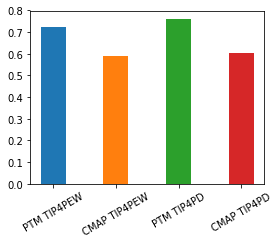

In [18]:
plt.subplots(figsize=(4,3.5))

RMSD_1 = RMSD(CA_2shift_avg,Experimental_data)
RMSD_2 = RMSD(CA_2shift_CMAP_avg,Experimental_data)
RMSD_3 = RMSD(CA_2shift_D_avg,Experimental_data)
RMSD_4 = RMSD(CA_2shift_D_CMAP_avg,Experimental_data)

color=['tab:blue','tab:orange','tab:green','tab:red']
x_label=['PTM TIP4PEW','CMAP TIP4PEW','PTM TIP4PD','CMAP TIP4PD']
plt.xticks([1,3,5,7], x_label,rotation='30')#绘制x刻度标签
plt.bar([1,3,5,7], [RMSD_1,RMSD_2,RMSD_3,RMSD_4],color=color)

plt.tight_layout()

plt.savefig("2cef_bar.png",dpi=100)
plt.show()

In [19]:
test_CA = loadpred_CA("2cef.md.pdb_pred_CMAP_sim1.tab")
test_HA = loadpred_HA("2cef.md.pdb_pred_CMAP_sim1.tab")
test_HN = loadpred_HN("2cef.md.pdb_pred_CMAP_sim1.tab")
test_N = loadpred_N("2cef.md.pdb_pred_CMAP_sim1.tab")
test_C = loadpred_C("2cef.md.pdb_pred_CMAP_sim1.tab")
test_CB = loadpred_CB("2cef.md.pdb_pred_CMAP_sim1.tab")




print(len(test_CA))
print(len(test_HA))
print(len(test_HN))
print(len(test_N))
print(len(test_C))
print(len(test_CB))

print(test_CB)


19
19
19
19
19
19
[27.718, 30.163, 33.855, 20.993, None, 31.296, None, 31.703, 63.425, 29.515, 36.575, 29.664, 39.532, 63.023, 32.331, 42.09, 39.101, 32.124, 63.199]


In [20]:
Experimental_data_CA = [None,None,56.2,52.4,None,62.3,45.2,55.7,58,57.5,55.6,56.3,53.3,55.8,None,55.16,53.1,62,60]
Experimental_data_HA = [None,None,4.14,4.15,3.83,4.06,None,4.24,4.35,4.5,4.07,4.01,4.85,4.69,4.28,4.2,4.65,4.15,4.19]
Experimental_data_HN = [None,None,8.5,8.39,8.25,8.04,8.7,8.2,8.99,8.13,7.79,8.16,8.44,8.66,None,8.35,8.43,8.14,8]
Experimental_data_N = [None,None,124.2,126.1,108.7,125.1,113.5,119.4,118,120.6,123.7,None,120.2,118.6,None,122.1,120.2,119,None]
Experimental_data_CB = [None,None,33.3,19.5,None,32.7,None,None,65.6,29.5,33.6,None,None,65.1,32.1,42.39,None,32.9,64.7]


# TIP4PEW Forcefield PTM
CA_2shift_sim1 = loadpred_CA("2cef.md.pdb_pred_sim1.tab")
HA_2shift_sim1 = loadpred_HA("2cef.md.pdb_pred_sim1.tab")
HN_2shift_sim1 = loadpred_HN("2cef.md.pdb_pred_sim1.tab")
N_2shift_sim1 = loadpred_N("2cef.md.pdb_pred_sim1.tab")
C_2shift_sim1 = loadpred_C("2cef.md.pdb_pred_sim1.tab")
CB_2shift_sim1 = loadpred_CB("2cef.md.pdb_pred_sim1.tab")

CA_2shift_sim2 = loadpred_CA("2cef.md.pdb_pred_sim2.tab")
HA_2shift_sim2 = loadpred_HA("2cef.md.pdb_pred_sim2.tab")
HN_2shift_sim2 = loadpred_HN("2cef.md.pdb_pred_sim2.tab")
N_2shift_sim2 = loadpred_N("2cef.md.pdb_pred_sim2.tab")
C_2shift_sim2 = loadpred_C("2cef.md.pdb_pred_sim2.tab")
CB_2shift_sim2 = loadpred_CB("2cef.md.pdb_pred_sim2.tab")

CA_2shift_sim3 = loadpred_CA("2cef.md.pdb_pred_sim3.tab")
HA_2shift_sim3 = loadpred_HA("2cef.md.pdb_pred_sim3.tab")
HN_2shift_sim3 = loadpred_HN("2cef.md.pdb_pred_sim3.tab")
N_2shift_sim3 = loadpred_N("2cef.md.pdb_pred_sim3.tab")
C_2shift_sim3 = loadpred_C("2cef.md.pdb_pred_sim3.tab")
CB_2shift_sim3 = loadpred_CB("2cef.md.pdb_pred_sim3.tab")

CA_2shift_sim4 = loadpred_CA("2cef.md.pdb_pred_sim4.tab")
HA_2shift_sim4 = loadpred_HA("2cef.md.pdb_pred_sim4.tab")
HN_2shift_sim4 = loadpred_HN("2cef.md.pdb_pred_sim4.tab")
N_2shift_sim4 = loadpred_N("2cef.md.pdb_pred_sim4.tab")
C_2shift_sim4 = loadpred_C("2cef.md.pdb_pred_sim4.tab")
CB_2shift_sim4 = loadpred_CB("2cef.md.pdb_pred_sim4.tab")

CA_2shift_sim5 = loadpred_CA("2cef.md.pdb_pred_sim5.tab")
HA_2shift_sim5 = loadpred_HA("2cef.md.pdb_pred_sim5.tab")
HN_2shift_sim5 = loadpred_HN("2cef.md.pdb_pred_sim5.tab")
N_2shift_sim5 = loadpred_N("2cef.md.pdb_pred_sim5.tab")
C_2shift_sim5 = loadpred_C("2cef.md.pdb_pred_sim5.tab")
CB_2shift_sim5 = loadpred_CB("2cef.md.pdb_pred_sim5.tab")




CA_2shift_avg = [(CA_2shift_sim1[i]+CA_2shift_sim2[i]+CA_2shift_sim3[i]+CA_2shift_sim4[i]+CA_2shift_sim5[i])/5 for i in range(len(CA_2shift_sim1))]

HA_2shift_avg = [(HA_2shift_sim1[i]+HA_2shift_sim2[i]+HA_2shift_sim3[i]+HA_2shift_sim4[i]+HA_2shift_sim5[i])/5 for i in range(len(HA_2shift_sim1))]

HN_2shift_avg = [(HN_2shift_sim1[i]+HN_2shift_sim2[i]+HN_2shift_sim3[i]+HN_2shift_sim4[i]+HN_2shift_sim5[i])/5 if HN_2shift_sim1[i] != None else HN_2shift_sim1[i] for i in range(len(HN_2shift_sim1))]

N_2shift_avg = [(N_2shift_sim1[i]+N_2shift_sim2[i]+N_2shift_sim3[i]+N_2shift_sim4[i]+N_2shift_sim5[i])/5 if N_2shift_sim1[i] != None else N_2shift_sim1[i] for i in range(len(N_2shift_sim1))]

CB_2shift_avg = [(CB_2shift_sim1[i]+CB_2shift_sim2[i]+CB_2shift_sim3[i]+CB_2shift_sim4[i]+CB_2shift_sim5[i])/5 if CB_2shift_sim1[i] != None else CB_2shift_sim1[i] for i in range(len(CB_2shift_sim1))]

print(RMSD(CA_2shift_avg,Experimental_data_CA))
print(RMSD(HA_2shift_avg,Experimental_data_HA))
print(RMSD(HN_2shift_avg,Experimental_data_HN))
print(RMSD(N_2shift_avg,Experimental_data_N))
print(RMSD(CB_2shift_avg,Experimental_data_CB))


0.6775148411658594
0.23697547552436715
0.288235093861475
3.058884184516586
0.9715868134140133


In [21]:
# TIP4PEW ff03CMAP

CA_2shift_CMAP_sim1 = loadpred_CA("2cef.md.pdb_pred_CMAP_sim1.tab")
HA_2shift_CMAP_sim1 = loadpred_HA("2cef.md.pdb_pred_CMAP_sim1.tab")
HN_2shift_CMAP_sim1 = loadpred_HN("2cef.md.pdb_pred_CMAP_sim1.tab")
N_2shift_CMAP_sim1 = loadpred_N("2cef.md.pdb_pred_CMAP_sim1.tab")
C_2shift_CMAP_sim1 = loadpred_C("2cef.md.pdb_pred_CMAP_sim1.tab")
CB_2shift_CMAP_sim1 = loadpred_CB("2cef.md.pdb_pred_CMAP_sim1.tab")

CA_2shift_CMAP_sim2 = loadpred_CA("2cef.md.pdb_pred_CMAP_sim2.tab")
HA_2shift_CMAP_sim2 = loadpred_HA("2cef.md.pdb_pred_CMAP_sim2.tab")
HN_2shift_CMAP_sim2 = loadpred_HN("2cef.md.pdb_pred_CMAP_sim2.tab")
N_2shift_CMAP_sim2 = loadpred_N("2cef.md.pdb_pred_CMAP_sim2.tab")
C_2shift_CMAP_sim2 = loadpred_C("2cef.md.pdb_pred_CMAP_sim2.tab")
CB_2shift_CMAP_sim2 = loadpred_CB("2cef.md.pdb_pred_CMAP_sim2.tab")

CA_2shift_CMAP_sim3 = loadpred_CA("2cef.md.pdb_pred_CMAP_sim3.tab")
HA_2shift_CMAP_sim3 = loadpred_HA("2cef.md.pdb_pred_CMAP_sim3.tab")
HN_2shift_CMAP_sim3 = loadpred_HN("2cef.md.pdb_pred_CMAP_sim3.tab")
N_2shift_CMAP_sim3 = loadpred_N("2cef.md.pdb_pred_CMAP_sim3.tab")
C_2shift_CMAP_sim3 = loadpred_C("2cef.md.pdb_pred_CMAP_sim3.tab")
CB_2shift_CMAP_sim3 = loadpred_CB("2cef.md.pdb_pred_CMAP_sim3.tab")

CA_2shift_CMAP_sim4 = loadpred_CA("2cef.md.pdb_pred_CMAP_sim4.tab")
HA_2shift_CMAP_sim4 = loadpred_HA("2cef.md.pdb_pred_CMAP_sim4.tab")
HN_2shift_CMAP_sim4 = loadpred_HN("2cef.md.pdb_pred_CMAP_sim4.tab")
N_2shift_CMAP_sim4 = loadpred_N("2cef.md.pdb_pred_CMAP_sim4.tab")
C_2shift_CMAP_sim4 = loadpred_C("2cef.md.pdb_pred_CMAP_sim4.tab")
CB_2shift_CMAP_sim4 = loadpred_CB("2cef.md.pdb_pred_CMAP_sim4.tab")

CA_2shift_CMAP_sim5 = loadpred_CA("2cef.md.pdb_pred_CMAP_sim5.tab")
HA_2shift_CMAP_sim5 = loadpred_HA("2cef.md.pdb_pred_CMAP_sim5.tab")
HN_2shift_CMAP_sim5 = loadpred_HN("2cef.md.pdb_pred_CMAP_sim5.tab")
N_2shift_CMAP_sim5 = loadpred_N("2cef.md.pdb_pred_CMAP_sim5.tab")
C_2shift_CMAP_sim5 = loadpred_C("2cef.md.pdb_pred_CMAP_sim5.tab")
CB_2shift_CMAP_sim5 = loadpred_CB("2cef.md.pdb_pred_CMAP_sim5.tab")




CA_2shift_CMAP_avg = [(CA_2shift_CMAP_sim1[i]+CA_2shift_CMAP_sim2[i]+CA_2shift_CMAP_sim3[i]+CA_2shift_CMAP_sim4[i]+CA_2shift_CMAP_sim5[i])/5 for i in range(len(CA_2shift_CMAP_sim1))]

HA_2shift_CMAP_avg = [(HA_2shift_CMAP_sim1[i]+HA_2shift_CMAP_sim2[i]+HA_2shift_CMAP_sim3[i]+HA_2shift_CMAP_sim4[i]+HA_2shift_CMAP_sim5[i])/5 for i in range(len(HA_2shift_CMAP_sim1))]

HN_2shift_CMAP_avg = [(HN_2shift_CMAP_sim1[i]+HN_2shift_CMAP_sim2[i]+HN_2shift_CMAP_sim3[i]+HN_2shift_CMAP_sim4[i]+HN_2shift_CMAP_sim5[i])/5 if HN_2shift_CMAP_sim1[i] != None else HN_2shift_CMAP_sim1[i] for i in range(len(HN_2shift_CMAP_sim1))]

N_2shift_CMAP_avg = [(N_2shift_CMAP_sim1[i]+N_2shift_CMAP_sim2[i]+N_2shift_CMAP_sim3[i]+N_2shift_CMAP_sim4[i]+N_2shift_CMAP_sim5[i])/5 if N_2shift_CMAP_sim1[i] != None else N_2shift_CMAP_sim1[i] for i in range(len(N_2shift_CMAP_sim1))]

CB_2shift_CMAP_avg = [(CB_2shift_CMAP_sim1[i]+CB_2shift_CMAP_sim2[i]+CB_2shift_CMAP_sim3[i]+CB_2shift_CMAP_sim4[i]+CB_2shift_CMAP_sim5[i])/5 if CB_2shift_CMAP_sim1[i] != None else CB_2shift_CMAP_sim1[i] for i in range(len(CB_2shift_CMAP_sim1))]

print(RMSD(CA_2shift_CMAP_avg,Experimental_data_CA))
print(RMSD(HA_2shift_CMAP_avg,Experimental_data_HA))
print(RMSD(HN_2shift_CMAP_avg,Experimental_data_HN))
print(RMSD(N_2shift_CMAP_avg,Experimental_data_N))
print(RMSD(CB_2shift_CMAP_avg,Experimental_data_CB))

0.5877957857234842
0.21571609737492134
0.25896403868748485
2.6395263406257463
1.1982412444912736


In [22]:
# TIP4PD Forcefield PTM

CA_2shift_D_sim1 = loadpred_CA("2cef.md.pdb_pred_D_sim1.tab")
HA_2shift_D_sim1 = loadpred_HA("2cef.md.pdb_pred_D_sim1.tab")
HN_2shift_D_sim1 = loadpred_HN("2cef.md.pdb_pred_D_sim1.tab")
N_2shift_D_sim1 = loadpred_N("2cef.md.pdb_pred_D_sim1.tab")
C_2shift_D_sim1 = loadpred_C("2cef.md.pdb_pred_D_sim1.tab")
CB_2shift_D_sim1 = loadpred_CB("2cef.md.pdb_pred_D_sim1.tab")

CA_2shift_D_sim2 = loadpred_CA("2cef.md.pdb_pred_D_sim2.tab")
HA_2shift_D_sim2 = loadpred_HA("2cef.md.pdb_pred_D_sim2.tab")
HN_2shift_D_sim2 = loadpred_HN("2cef.md.pdb_pred_D_sim2.tab")
N_2shift_D_sim2 = loadpred_N("2cef.md.pdb_pred_D_sim2.tab")
C_2shift_D_sim2 = loadpred_C("2cef.md.pdb_pred_D_sim2.tab")
CB_2shift_D_sim2 = loadpred_CB("2cef.md.pdb_pred_D_sim2.tab")

CA_2shift_D_sim3 = loadpred_CA("2cef.md.pdb_pred_D_sim3.tab")
HA_2shift_D_sim3 = loadpred_HA("2cef.md.pdb_pred_D_sim3.tab")
HN_2shift_D_sim3 = loadpred_HN("2cef.md.pdb_pred_D_sim3.tab")
N_2shift_D_sim3 = loadpred_N("2cef.md.pdb_pred_D_sim3.tab")
C_2shift_D_sim3 = loadpred_C("2cef.md.pdb_pred_D_sim3.tab")
CB_2shift_D_sim3 = loadpred_CB("2cef.md.pdb_pred_D_sim3.tab")

CA_2shift_D_sim4 = loadpred_CA("2cef.md.pdb_pred_D_sim4.tab")
HA_2shift_D_sim4 = loadpred_HA("2cef.md.pdb_pred_D_sim4.tab")
HN_2shift_D_sim4 = loadpred_HN("2cef.md.pdb_pred_D_sim4.tab")
N_2shift_D_sim4 = loadpred_N("2cef.md.pdb_pred_D_sim4.tab")
C_2shift_D_sim4 = loadpred_C("2cef.md.pdb_pred_D_sim4.tab")
CB_2shift_D_sim4 = loadpred_CB("2cef.md.pdb_pred_D_sim4.tab")

CA_2shift_D_sim5 = loadpred_CA("2cef.md.pdb_pred_D_sim5.tab")
HA_2shift_D_sim5 = loadpred_HA("2cef.md.pdb_pred_D_sim5.tab")
HN_2shift_D_sim5 = loadpred_HN("2cef.md.pdb_pred_D_sim5.tab")
N_2shift_D_sim5 = loadpred_N("2cef.md.pdb_pred_D_sim5.tab")
C_2shift_D_sim5 = loadpred_C("2cef.md.pdb_pred_D_sim5.tab")
CB_2shift_D_sim5 = loadpred_CB("2cef.md.pdb_pred_D_sim5.tab")




CA_2shift_D_avg = [(CA_2shift_D_sim1[i]+CA_2shift_D_sim2[i]+CA_2shift_D_sim3[i]+CA_2shift_D_sim4[i]+CA_2shift_D_sim5[i])/5 for i in range(len(CA_2shift_D_sim1))]

HA_2shift_D_avg = [(HA_2shift_D_sim1[i]+HA_2shift_D_sim2[i]+HA_2shift_D_sim3[i]+HA_2shift_D_sim4[i]+HA_2shift_D_sim5[i])/5 for i in range(len(HA_2shift_D_sim1))]

HN_2shift_D_avg = [(HN_2shift_D_sim1[i]+HN_2shift_D_sim2[i]+HN_2shift_D_sim3[i]+HN_2shift_D_sim4[i]+HN_2shift_D_sim5[i])/5 if HN_2shift_D_sim1[i] != None else HN_2shift_D_sim1[i] for i in range(len(HN_2shift_D_sim1))]

N_2shift_D_avg = [(N_2shift_D_sim1[i]+N_2shift_D_sim2[i]+N_2shift_D_sim3[i]+N_2shift_D_sim4[i]+N_2shift_D_sim5[i])/5 if N_2shift_D_sim1[i] != None else N_2shift_D_sim1[i] for i in range(len(N_2shift_D_sim1))]

CB_2shift_D_avg = [(CB_2shift_D_sim1[i]+CB_2shift_D_sim2[i]+CB_2shift_D_sim3[i]+CB_2shift_D_sim4[i]+CB_2shift_D_sim5[i])/5 if CB_2shift_D_sim1[i] != None else CB_2shift_D_sim1[i] for i in range(len(CB_2shift_D_sim1))]

print(RMSD(CA_2shift_D_avg,Experimental_data_CA))
print(RMSD(HA_2shift_D_avg,Experimental_data_HA))
print(RMSD(HN_2shift_D_avg,Experimental_data_HN))
print(RMSD(N_2shift_D_avg,Experimental_data_N))
print(RMSD(CB_2shift_D_avg,Experimental_data_CB))

0.7462584711172706
0.14932705046306907
0.34664076313478537
2.2501037455446995
1.296634335500952


In [23]:
# TIP4PD ff03CMAP

CA_2shift_D_CMAP_sim1 = loadpred_CA("2cef.md.pdb_pred_D_CMAP_sim1.tab")
HA_2shift_D_CMAP_sim1 = loadpred_HA("2cef.md.pdb_pred_D_CMAP_sim1.tab")
HN_2shift_D_CMAP_sim1 = loadpred_HN("2cef.md.pdb_pred_D_CMAP_sim1.tab")
N_2shift_D_CMAP_sim1 = loadpred_N("2cef.md.pdb_pred_D_CMAP_sim1.tab")
C_2shift_D_CMAP_sim1 = loadpred_C("2cef.md.pdb_pred_D_CMAP_sim1.tab")
CB_2shift_D_CMAP_sim1 = loadpred_CB("2cef.md.pdb_pred_D_CMAP_sim1.tab")

CA_2shift_D_CMAP_sim2 = loadpred_CA("2cef.md.pdb_pred_D_CMAP_sim2.tab")
HA_2shift_D_CMAP_sim2 = loadpred_HA("2cef.md.pdb_pred_D_CMAP_sim2.tab")
HN_2shift_D_CMAP_sim2 = loadpred_HN("2cef.md.pdb_pred_D_CMAP_sim2.tab")
N_2shift_D_CMAP_sim2 = loadpred_N("2cef.md.pdb_pred_D_CMAP_sim2.tab")
C_2shift_D_CMAP_sim2 = loadpred_C("2cef.md.pdb_pred_D_CMAP_sim2.tab")
CB_2shift_D_CMAP_sim2 = loadpred_CB("2cef.md.pdb_pred_D_CMAP_sim2.tab")

CA_2shift_D_CMAP_sim3 = loadpred_CA("2cef.md.pdb_pred_D_CMAP_sim3.tab")
HA_2shift_D_CMAP_sim3 = loadpred_HA("2cef.md.pdb_pred_D_CMAP_sim3.tab")
HN_2shift_D_CMAP_sim3 = loadpred_HN("2cef.md.pdb_pred_D_CMAP_sim3.tab")
N_2shift_D_CMAP_sim3 = loadpred_N("2cef.md.pdb_pred_D_CMAP_sim3.tab")
C_2shift_D_CMAP_sim3 = loadpred_C("2cef.md.pdb_pred_D_CMAP_sim3.tab")
CB_2shift_D_CMAP_sim3 = loadpred_CB("2cef.md.pdb_pred_D_CMAP_sim3.tab")

CA_2shift_D_CMAP_sim4 = loadpred_CA("2cef.md.pdb_pred_D_CMAP_sim4.tab")
HA_2shift_D_CMAP_sim4 = loadpred_HA("2cef.md.pdb_pred_D_CMAP_sim4.tab")
HN_2shift_D_CMAP_sim4 = loadpred_HN("2cef.md.pdb_pred_D_CMAP_sim4.tab")
N_2shift_D_CMAP_sim4 = loadpred_N("2cef.md.pdb_pred_D_CMAP_sim4.tab")
C_2shift_D_CMAP_sim4 = loadpred_C("2cef.md.pdb_pred_D_CMAP_sim4.tab")
CB_2shift_D_CMAP_sim4 = loadpred_CB("2cef.md.pdb_pred_D_CMAP_sim4.tab")

CA_2shift_D_CMAP_sim5 = loadpred_CA("2cef.md.pdb_pred_D_CMAP_sim5.tab")
HA_2shift_D_CMAP_sim5 = loadpred_HA("2cef.md.pdb_pred_D_CMAP_sim5.tab")
HN_2shift_D_CMAP_sim5 = loadpred_HN("2cef.md.pdb_pred_D_CMAP_sim5.tab")
N_2shift_D_CMAP_sim5 = loadpred_N("2cef.md.pdb_pred_D_CMAP_sim5.tab")
C_2shift_D_CMAP_sim5 = loadpred_C("2cef.md.pdb_pred_D_CMAP_sim5.tab")
CB_2shift_D_CMAP_sim5 = loadpred_CB("2cef.md.pdb_pred_D_CMAP_sim5.tab")




CA_2shift_D_CMAP_avg = [(CA_2shift_D_CMAP_sim1[i]+CA_2shift_D_CMAP_sim2[i]+CA_2shift_D_CMAP_sim3[i]+CA_2shift_D_CMAP_sim4[i]+CA_2shift_D_CMAP_sim5[i])/5 for i in range(len(CA_2shift_D_CMAP_sim1))]

HA_2shift_D_CMAP_avg = [(HA_2shift_D_CMAP_sim1[i]+HA_2shift_D_CMAP_sim2[i]+HA_2shift_D_CMAP_sim3[i]+HA_2shift_D_CMAP_sim4[i]+HA_2shift_D_CMAP_sim5[i])/5 for i in range(len(HA_2shift_D_CMAP_sim1))]

HN_2shift_D_CMAP_avg = [(HN_2shift_D_CMAP_sim1[i]+HN_2shift_D_CMAP_sim2[i]+HN_2shift_D_CMAP_sim3[i]+HN_2shift_D_CMAP_sim4[i]+HN_2shift_D_CMAP_sim5[i])/5 if HN_2shift_D_CMAP_sim1[i] != None else HN_2shift_D_CMAP_sim1[i] for i in range(len(HN_2shift_D_CMAP_sim1))]

N_2shift_D_CMAP_avg = [(N_2shift_D_CMAP_sim1[i]+N_2shift_D_CMAP_sim2[i]+N_2shift_D_CMAP_sim3[i]+N_2shift_D_CMAP_sim4[i]+N_2shift_D_CMAP_sim5[i])/5 if N_2shift_D_CMAP_sim1[i] != None else N_2shift_D_CMAP_sim1[i] for i in range(len(N_2shift_D_CMAP_sim1))]

CB_2shift_D_CMAP_avg = [(CB_2shift_D_CMAP_sim1[i]+CB_2shift_D_CMAP_sim2[i]+CB_2shift_D_CMAP_sim3[i]+CB_2shift_D_CMAP_sim4[i]+CB_2shift_D_CMAP_sim5[i])/5 if CB_2shift_D_CMAP_sim1[i] != None else CB_2shift_D_CMAP_sim1[i] for i in range(len(CB_2shift_D_CMAP_sim1))]

print(RMSD(CA_2shift_D_CMAP_avg,Experimental_data_CA))
print(RMSD(HA_2shift_D_CMAP_avg,Experimental_data_HA))
print(RMSD(HN_2shift_D_CMAP_avg,Experimental_data_HN))
print(RMSD(N_2shift_D_CMAP_avg,Experimental_data_N))
print(RMSD(CB_2shift_D_CMAP_avg,Experimental_data_CB))

0.5924205938351562
0.20315225817105753
0.21952377547773694
2.2501331173320125
1.1546419878040068


In [32]:
RMSD_EW = (RMSD(CA_2shift_avg,Experimental_data_CA),RMSD(CB_2shift_avg,Experimental_data_CB),RMSD(N_2shift_avg,Experimental_data_N),RMSD(HA_2shift_avg,Experimental_data_HA),RMSD(HN_2shift_avg,Experimental_data_HN))
RMSD_EWC = (RMSD(CA_2shift_CMAP_avg,Experimental_data_CA),RMSD(CB_2shift_CMAP_avg,Experimental_data_CB),RMSD(N_2shift_CMAP_avg,Experimental_data_N),RMSD(HA_2shift_CMAP_avg,Experimental_data_HA),RMSD(HN_2shift_CMAP_avg,Experimental_data_HN))
RMSD_D = (RMSD(CA_2shift_D_avg,Experimental_data_CA),RMSD(CB_2shift_D_avg,Experimental_data_CB),RMSD(N_2shift_D_avg,Experimental_data_N),RMSD(HA_2shift_D_avg,Experimental_data_HA),RMSD(HN_2shift_D_avg,Experimental_data_HN))
RMSD_DC = (RMSD(CA_2shift_D_CMAP_avg,Experimental_data_CA),RMSD(CB_2shift_D_CMAP_avg,Experimental_data_CB),RMSD(N_2shift_D_CMAP_avg,Experimental_data_N),RMSD(HA_2shift_D_CMAP_avg,Experimental_data_HA),RMSD(HN_2shift_D_CMAP_avg,Experimental_data_HN))

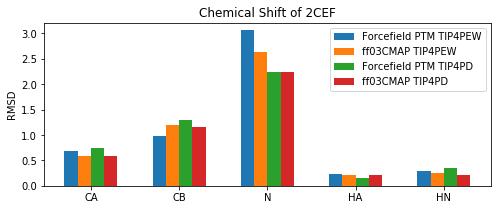

In [33]:
ind = np.arange(len(pSER_EW))  # the x locations for the groups
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(8,3))
rects1 = ax.bar(ind - width*3/2, RMSD_EW, width, label='Forcefield PTM TIP4PEW')
rects2 = ax.bar(ind - width/2, RMSD_EWC, width, label='ff03CMAP TIP4PEW')
rects3 = ax.bar(ind + width/2, RMSD_D, width, label='Forcefield PTM TIP4PD')
rects4 = ax.bar(ind + width*3/2, RMSD_DC, width, label='ff03CMAP TIP4PD')                

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RMSD')
ax.set_title('Chemical Shift of 2CEF')
ax.set_xticks(ind)
ax.set_xticklabels(('CA', 'CB', 'N', 'HA','HN'))
ax.legend()


plt.savefig('chemshift_bar_2cef.png',dpi=200)

plt.show()

In [24]:
# Modified Residue
pSER_EW = (abs(CA_2shift_avg[8]-Experimental_data_CA[8]),abs(CB_2shift_avg[8]-Experimental_data_CB[8]),abs(N_2shift_avg[8]-Experimental_data_N[8]),abs(HA_2shift_avg[8]-Experimental_data_HA[8]),abs(HN_2shift_avg[8]-Experimental_data_HN[8]))
pSER_EWC = (abs(CA_2shift_CMAP_avg[8]-Experimental_data_CA[8]),abs(CB_2shift_CMAP_avg[8]-Experimental_data_CB[8]),abs(N_2shift_CMAP_avg[8]-Experimental_data_N[8]),abs(HA_2shift_CMAP_avg[8]-Experimental_data_HA[8]),abs(HN_2shift_CMAP_avg[8]-Experimental_data_HN[8]))
pSER_D = (abs(CA_2shift_D_avg[8]-Experimental_data_CA[8]),abs(CB_2shift_D_avg[8]-Experimental_data_CB[8]),abs(N_2shift_D_avg[8]-Experimental_data_N[8]),abs(HA_2shift_D_avg[8]-Experimental_data_HA[8]),abs(HN_2shift_D_avg[8]-Experimental_data_HN[8]))
pSER_DC = (abs(CA_2shift_D_CMAP_avg[8]-Experimental_data_CA[8]),abs(CB_2shift_D_CMAP_avg[8]-Experimental_data_CB[8]),abs(N_2shift_D_CMAP_avg[8]-Experimental_data_N[8]),abs(HA_2shift_D_CMAP_avg[8]-Experimental_data_HA[8]),abs(HN_2shift_D_CMAP_avg[8]-Experimental_data_HN[8]))


print(pSER_EW)
print(pSER_EWC)
print(pSER_D)
print(pSER_DC)

(0.9883999999999986, 2.370599999999996, 1.0848000000000013, 0.21880000000000077, 0.40119999999999933)
(0.33259999999999934, 2.163799999999995, 0.42799999999999727, 0.19480000000000075, 0.4062000000000001)
(1.3056000000000054, 2.874599999999994, 2.3245999999999896, 0.120000000000001, 0.40979999999999883)
(0.2400000000000091, 2.9621999999999886, 1.2483999999999895, 0.2776000000000005, 0.4692000000000007)


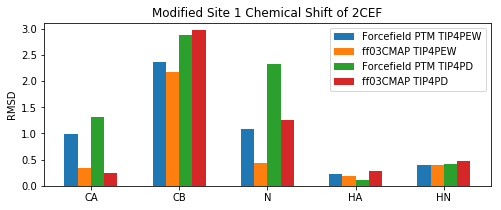

In [25]:
ind = np.arange(len(pSER_EW))  # the x locations for the groups
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(8,3))
rects1 = ax.bar(ind - width*3/2, pSER_EW, width, label='Forcefield PTM TIP4PEW')
rects2 = ax.bar(ind - width/2, pSER_EWC, width, label='ff03CMAP TIP4PEW')
rects3 = ax.bar(ind + width/2, pSER_D, width, label='Forcefield PTM TIP4PD')
rects4 = ax.bar(ind + width*3/2, pSER_DC, width, label='ff03CMAP TIP4PD')                

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RMSD')
ax.set_title('Modified Site 1 Chemical Shift of 2CEF')
ax.set_xticks(ind)
ax.set_xticklabels(('CA', 'CB', 'N', 'HA','HN'))
ax.legend()


plt.savefig('modifiedChemShift_1.png',dpi=100)
plt.savefig('modifiedChemShift_1.svg')

plt.show()

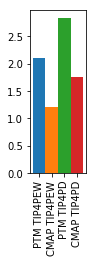

In [26]:
ff_score = (2.11,1.20,2.84,1.76)

plt.subplots(figsize=(1,3))

color=['tab:blue','tab:orange','tab:green','tab:red']
x_label=['PTM TIP4PEW','CMAP TIP4PEW','PTM TIP4PD','CMAP TIP4PD']
plt.xticks([1,1.15,1.3,1.45],x_label,rotation='90')
plt.bar([1,1.15,1.3,1.45],ff_score,0.15,color=color)

plt.savefig('modifiedffscore.png',dpi=100)
plt.show()

In [27]:
# Modified Residue
pSER_EW = (abs(CA_2shift_avg[13]-Experimental_data_CA[13]),abs(CB_2shift_avg[13]-Experimental_data_CB[13]),abs(N_2shift_avg[13]-Experimental_data_N[13]),abs(HA_2shift_avg[13]-Experimental_data_HA[13]),abs(HN_2shift_avg[13]-Experimental_data_HN[13]))
pSER_EWC = (abs(CA_2shift_CMAP_avg[13]-Experimental_data_CA[13]),abs(CB_2shift_CMAP_avg[13]-Experimental_data_CB[13]),abs(N_2shift_CMAP_avg[13]-Experimental_data_N[13]),abs(HA_2shift_CMAP_avg[13]-Experimental_data_HA[13]),abs(HN_2shift_CMAP_avg[13]-Experimental_data_HN[13]))
pSER_D = (abs(CA_2shift_D_avg[13]-Experimental_data_CA[13]),abs(CB_2shift_D_avg[13]-Experimental_data_CB[13]),abs(N_2shift_D_avg[13]-Experimental_data_N[13]),abs(HA_2shift_D_avg[13]-Experimental_data_HA[13]),abs(HN_2shift_D_avg[13]-Experimental_data_HN[13]))
pSER_DC = (abs(CA_2shift_D_CMAP_avg[13]-Experimental_data_CA[13]),abs(CB_2shift_D_CMAP_avg[13]-Experimental_data_CB[13]),abs(N_2shift_D_CMAP_avg[13]-Experimental_data_N[13]),abs(HA_2shift_D_CMAP_avg[13]-Experimental_data_HA[13]),abs(HN_2shift_D_CMAP_avg[13]-Experimental_data_HN[13]))


print(pSER_EW)
print(pSER_EWC)
print(pSER_D)
print(pSER_DC)

(0.75, 1.3321999999999932, 0.5937999999999874, 0.07519999999999971, 0.42439999999999856)
(1.1193999999999988, 2.1587999999999923, 0.46819999999999595, 0.030199999999999783, 0.4710000000000001)
(1.0672000000000068, 2.089199999999998, 1.0604000000000013, 0.1761999999999988, 0.4549999999999983)
(1.3987999999999943, 1.826599999999992, 0.7266000000000048, 0.09299999999999997, 0.3691999999999993)


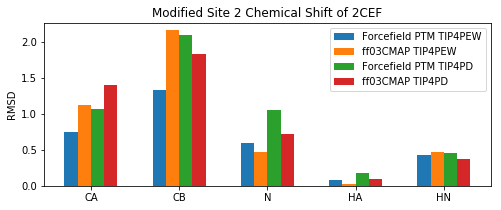

In [28]:
ind = np.arange(len(pSER_EW))  # the x locations for the groups
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(8,3))
rects1 = ax.bar(ind - width*3/2, pSER_EW, width, label='Forcefield PTM TIP4PEW')
rects2 = ax.bar(ind - width/2, pSER_EWC, width, label='ff03CMAP TIP4PEW')
rects3 = ax.bar(ind + width/2, pSER_D, width, label='Forcefield PTM TIP4PD')
rects4 = ax.bar(ind + width*3/2, pSER_DC, width, label='ff03CMAP TIP4PD')                

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RMSD')
ax.set_title('Modified Site 2 Chemical Shift of 2CEF')
ax.set_xticks(ind)
ax.set_xticklabels(('CA', 'CB', 'N', 'HA','HN'))
ax.legend()


plt.savefig('modifiedChemShift_2.png',dpi=100)
plt.savefig('modifiedChemShift_2.svg')

plt.show()

In [29]:
dataset = np.array(CA_2shift_avg)
dataset = np.vstack((dataset,CA_2shift_CMAP_avg))
dataset = np.vstack((dataset,CA_2shift_D_avg))
dataset = np.vstack((dataset,CA_2shift_D_CMAP_avg))
dataset = dataset

HEADER = str(res_list)[1:-1]
np.savetxt("SimulationData2CEF.csv",dataset,delimiter=",",header=HEADER)